## Cosine Similarity Calculations
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Similarity measures have a multiude of uses in machine learning projects; they come in handy when matching strings, measuring distance, and extracting features. This similarity measurement is particularly concerned with orientation, rather than magnitude. 
In this case study, you'll use the cosine similarity to compare both a numeric data within a plane and a text dataset for string matching.

Load the Python modules, including cosine_similarity, from sklearn.metrics.pairwise

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

**<font color='teal'> Load the distance dataset into a dataframe. </font>**

In [17]:
# Load Course Numerical Dataset
df = pd.read_csv('C:\\Users\\Admin\\CosineSimilarityCaseStudy/distance_dataset (1).csv',index_col=0)
df.head()

,X,Y,Z,ClusterID
0,5.135779,4.167542,5.787635,4
1,4.280721,5.770909,6.091044,4
2,8.329098,7.540436,3.247239,2
3,5.470224,5.069249,5.768313,4
4,2.381797,2.402374,3.879101,1


In [20]:
df.shape

(2000, 4)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          2000 non-null   float64
 1   Y          2000 non-null   float64
 2   Z          2000 non-null   float64
 3   ClusterID  2000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 78.1 KB


### Cosine Similarity with clusters and numeric matrices

All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

 **<font color='teal'> First, create a 2D and a 3D matrix from the dataframe. The 2D matrix should contain the 'Y' and 'Z' columns and the 3D matrix should contain the 'X','Y', and 'Z' columns.</font>**

In [22]:
# get only Y & Z column and store in different dataframe
two_dim_matrix = df.values[:,1:3]

In [23]:
two_dim_matrix.shape

(2000, 2)

In [24]:
two_dim_matrix

array([[4.16754224, 5.7876354 ],
       [5.77090875, 6.0910442 ],
       [7.54043595, 3.2472394 ],
       ...,
       [2.35191142, 6.77931097],
       [5.64267723, 4.85577967],
       [5.27055029, 7.84476766]])

In [25]:
# get X, Y & Z column and store in different dataframe
three_dim_matrix = df.values[:,1:4]

In [26]:
three_dim_matrix.shape

(2000, 3)

In [27]:
three_dim_matrix

array([[4.16754224, 5.7876354 , 4.        ],
       [5.77090875, 6.0910442 , 4.        ],
       [7.54043595, 3.2472394 , 2.        ],
       ...,
       [2.35191142, 6.77931097, 1.        ],
       [5.64267723, 4.85577967, 4.        ],
       [5.27055029, 7.84476766, 3.        ]])

In [28]:
# Calculating cosing similarity
simCosine3D = 1. - cosine_similarity(three_dim_matrix, [[5,5,5]], 'cosine')
simCosine = 1. - cosine_similarity(two_dim_matrix, [[5,5]], 'cosine')

In [29]:
cosine_similarity(three_dim_matrix, [[5,5,5]], 'cosine')

array([[0.98531453],
       [0.98520949],
       [0.87372254],
       ...,
       [0.80734783],
       [0.99050367],
       [0.93833809]])

In [30]:
simCosine3D

array([[0.01468547],
       [0.01479051],
       [0.12627746],
       ...,
       [0.19265217],
       [0.00949633],
       [0.06166191]])

In [31]:
simCosine

array([[0.0129846 ],
       [0.00036399],
       [0.0708751 ],
       ...,
       [0.10019132],
       [0.00279724],
       [0.01872281]])

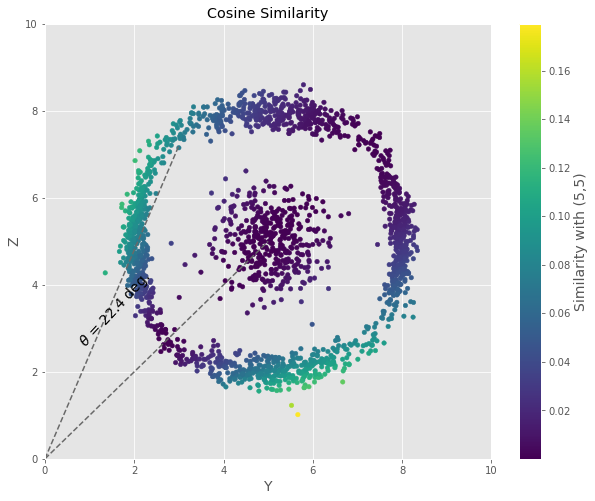

In [34]:
# Plot thr similarity
figCosine = plt.figure(figsize=[10,8])

plt.scatter(df.Y, df.Z, c=simCosine[:,0], s=20)
plt.plot([0,5],[0,5], '--', color='dimgray')
plt.plot([0,3],[0,7.2], '--', color='dimgray')
plt.text(0.7,2.6,r'$\theta$ = 22.4 deg.', rotation=47, size=14)
plt.ylim([0,10])
plt.xlim([0,10])
plt.xlabel('Y', size=14)
plt.ylabel('Z', size=14)
plt.title('Cosine Similarity')
cb = plt.colorbar()
cb.set_label('Similarity with (5,5)', size=14)

#figCosine.savefig('figs/similarity-cosine.png')


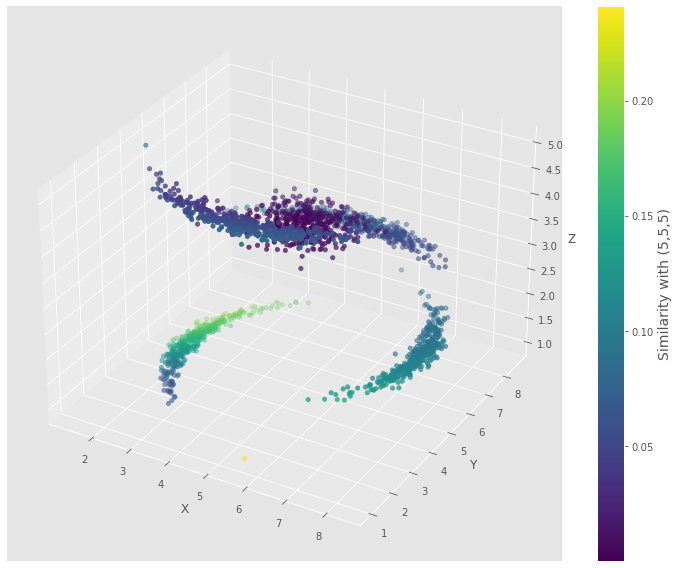

In [36]:
from mpl_toolkits.mplot3d import Axes3D
figCosine3D = plt.figure(figsize=(10, 8))
ax = figCosine3D.add_subplot(111, projection='3d')

p = ax.scatter(three_dim_matrix[:,0], three_dim_matrix[:,1], three_dim_matrix[:,2], c=simCosine3D[:,0])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
cb = figCosine3D.colorbar(p)
cb.set_label('Similarity with (5,5,5)', size=14)
                                   
figCosine3D.tight_layout()
#figCosine3D.savefig('figs/cosine-3D.png', dpi=300, transparent=True)

----

### Cosine Similarity with text data
This is a quick example of how you can use Cosine Similarity to compare different text values or names for record matching or other natural language proecessing needs. 
First, we use count vectorizer to create a vector for each unique word in our Document 0 and Document 1. 

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
Document1 = "Starbucks Coffee"
Document2 = "Essence of Coffee"

corpus = [Document1,Document2]

X_train_counts = count_vect.fit_transform(corpus)

pd.DataFrame(X_train_counts.toarray(),columns=count_vect.get_feature_names(),index=['Document 0','Document 1'])

,coffee,essence,of,starbucks
Document 0,1,0,0,1
Document 1,1,1,1,0


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['Document 0','Document 1'])

,coffee,essence,of,starbucks
Document 0,0.579739,0.000000,0.000000,0.814802
Document 1,0.449436,0.631667,0.631667,0.000000


In [42]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.26055567]])

In [43]:
LAMP = """LAMP (Linux, Apache, MySQL, PHP/Perl/Python) is a very common example 
            of a web service stack, named as an acronym of the names of its original 
            four open-source components: the Linux operating system, the Apache HTTP Server, 
            the MySQL relational database management system (RDBMS), and the PHP programming language. 
            The LAMP components are largely interchangeable and not limited to the original selection. 
            As a solution stack, LAMP is suitable for building dynamic web sites and web applications"""


MEAN = """MEAN (MongoDB, Express.js, AngularJS (or Angular), and Node.js) is a free and open-source
            JavaScript software stack for building dynamic web sites and web applications.
            Because all components of the MEAN stack support programs that are written in JavaScript, 
            MEAN applications can be written in one language for both server-side and client-side execution environments.
            Though often compared directly to other popular web development stacks such as the LAMP stack, 
            the components of the MEAN stack are higher-level including a web application presentation layer 
            and not including an operating system layer."""

In [44]:
corpus = [LAMP,MEAN]

In [45]:
X_train_counts = count_vect.fit_transform(corpus)

In [46]:
pd.DataFrame(X_train_counts.toarray(),columns=count_vect.get_feature_names(),index=['LAMP','MEAN'])

,acronym,all,an,and,angular,angularjs,apache,application,applications,are,...,suitable,support,system,that,the,though,to,very,web,written
LAMP,1,0,1,3,0,0,2,0,1,1,...,1,0,2,0,7,0,1,1,3,0
MEAN,0,1,1,5,1,1,0,1,2,2,...,0,1,1,1,4,1,1,0,4,2


In [47]:
trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['LAMP','MEAN'])

,acronym,all,an,and,angular,angularjs,apache,application,applications,are,...,suitable,support,system,that,the,though,to,very,web,written
LAMP,0.098417,0.000000,0.070024,0.210073,0.000000,0.000000,0.196834,0.000000,0.070024,0.070024,...,0.098417,0.000000,0.140049,0.000000,0.490171,0.000000,0.070024,0.098417,0.210073,0.000000
MEAN,0.000000,0.087146,0.062005,0.310027,0.087146,0.087146,0.000000,0.087146,0.124011,0.124011,...,0.000000,0.087146,0.062005,0.087146,0.248022,0.087146,0.062005,0.000000,0.248022,0.174293


In [48]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.42984719]])

In [49]:
#LAMP and MEAN documents are 43% similar